<a href="https://colab.research.google.com/github/1itt1echicken/1itt1echicken.github.io/blob/main/Diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ติดตั้งและนำเข้าไลบรารี


In [1]:
# ติดตั้งไลบรารีที่จำเป็น (หากยังไม่ได้ติดตั้ง)
!pip install pandas numpy matplotlib seaborn plotly scikit-learn

# นำเข้าไลบรารี
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ตั้งค่าการแสดงผลกราฟ
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

print("ไลบรารีพร้อมใช้งานแล้ว!")

ไลบรารีพร้อมใช้งานแล้ว!


# วิเคราะห์ข้อมูล


In [2]:
# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv('diabetes_dataset.csv')

# แสดง 5 แถวแรกของข้อมูล
print("5 แถวแรกของข้อมูล:")
display(df.head())

# ตรวจสอบขนาดข้อมูล
print(f"\nขนาดข้อมูล: {df.shape[0]} แถว x {df.shape[1]} คอลัมน์")

# ตรวจสอบประเภทข้อมูลของแต่ละคอลัมน์
print("\nประเภทข้อมูลของแต่ละคอลัมน์:")
display(df.dtypes)

# ตรวจสอบสถิติพื้นฐานของข้อมูลเชิงตัวเลข
print("\nสถิติพื้นฐานของข้อมูลเชิงตัวเลข:")
display(df.describe())

# ตรวจสอบค่าที่หายไป
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'จำนวนค่าที่หายไป': missing_values,
    'เปอร์เซ็นต์': missing_percent
})
print("\nค่าที่หายไปในแต่ละคอลัมน์:")
display(missing_data[missing_data['จำนวนค่าที่หายไป'] > 0])

5 แถวแรกของข้อมูล:


,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0



ขนาดข้อมูล: 10000 แถว x 21 คอลัมน์

ประเภทข้อมูลของแต่ละคอลัมน์:


,0
Unnamed: 0,int64
Age,int64
Sex,object
Ethnicity,object
BMI,float64
Waist_Circumference,float64
Fasting_Blood_Glucose,float64
HbA1c,float64
Blood_Pressure_Systolic,int64
Blood_Pressure_Diastolic,int64



สถิติพื้นฐานของข้อมูลเชิงตัวเลข:


,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000



ค่าที่หายไปในแต่ละคอลัมน์:


,จำนวนค่าที่หายไป,เปอร์เซ็นต์
Alcohol_Consumption,3320,33.2


In [3]:
# เติมค่าที่หายไปในคอลัมน์ตัวเลขด้วยค่ามัธยฐาน
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"เติมค่าที่หายไปในคอลัมน์ {col} ด้วยค่ามัธยฐาน ({median_value})")

# เติมค่าที่หายไปในคอลัมน์ข้อความด้วยค่าที่พบบ่อยที่สุด
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"เติมค่าที่หายไปในคอลัมน์ {col} ด้วยค่าที่พบบ่อยที่สุด ({mode_value})")

# ตรวจสอบค่าที่หายไปหลังจากเติมค่า
remaining_missing = df.isnull().sum().sum()
print(f"\nจำนวนค่าที่หายไปที่เหลือ: {remaining_missing}")

เติมค่าที่หายไปในคอลัมน์ Alcohol_Consumption ด้วยค่าที่พบบ่อยที่สุด (Moderate)

จำนวนค่าที่หายไปที่เหลือ: 0


<ipython-input-3-28668a1525cf>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


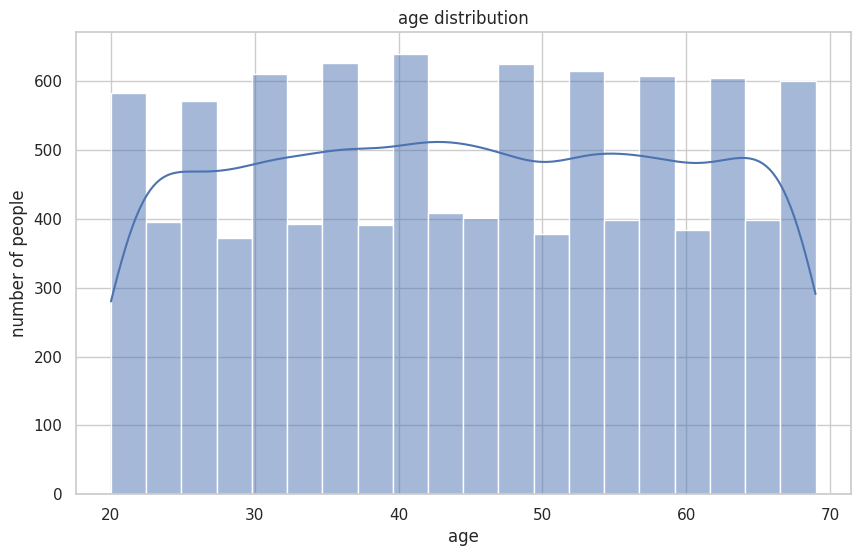

In [42]:
# สำรวจการกระจายตัวของอายุ
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('number of people')
plt.show()

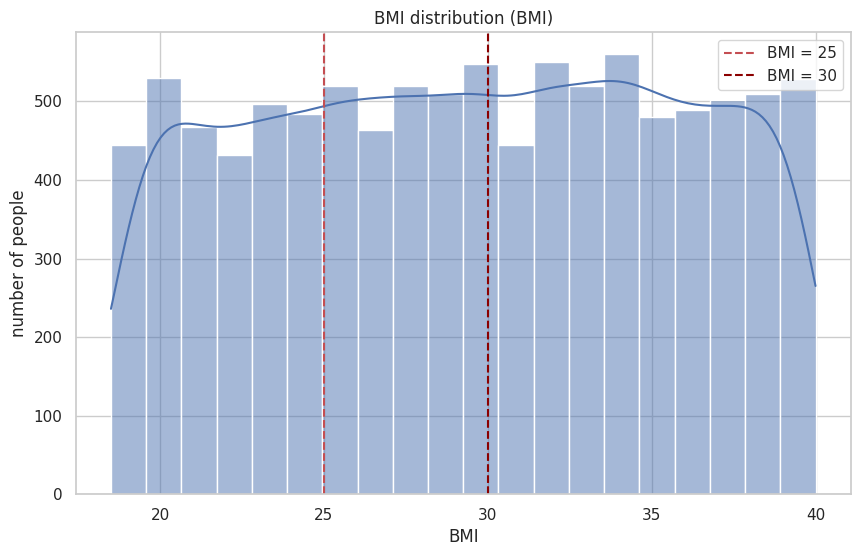

In [43]:
# สำรวจการกระจายตัวของ BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI distribution (BMI)')
plt.xlabel('BMI')
plt.ylabel('number of people')
plt.axvline(x=25, color='r', linestyle='--', label='BMI = 25')
plt.axvline(x=30, color='darkred', linestyle='--', label='BMI = 30')
plt.legend()
plt.show()

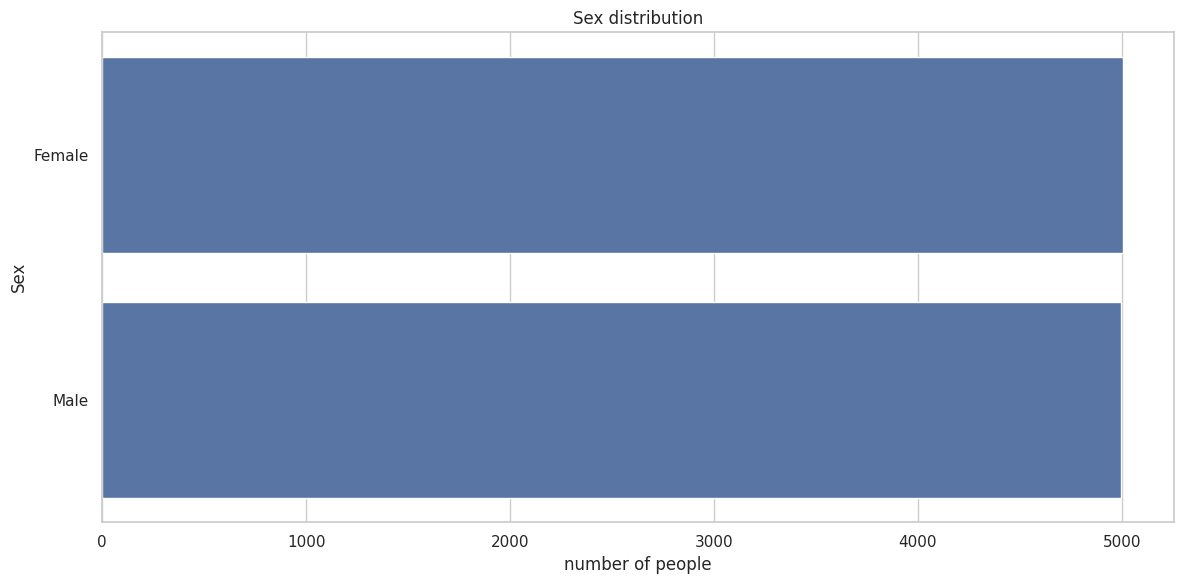

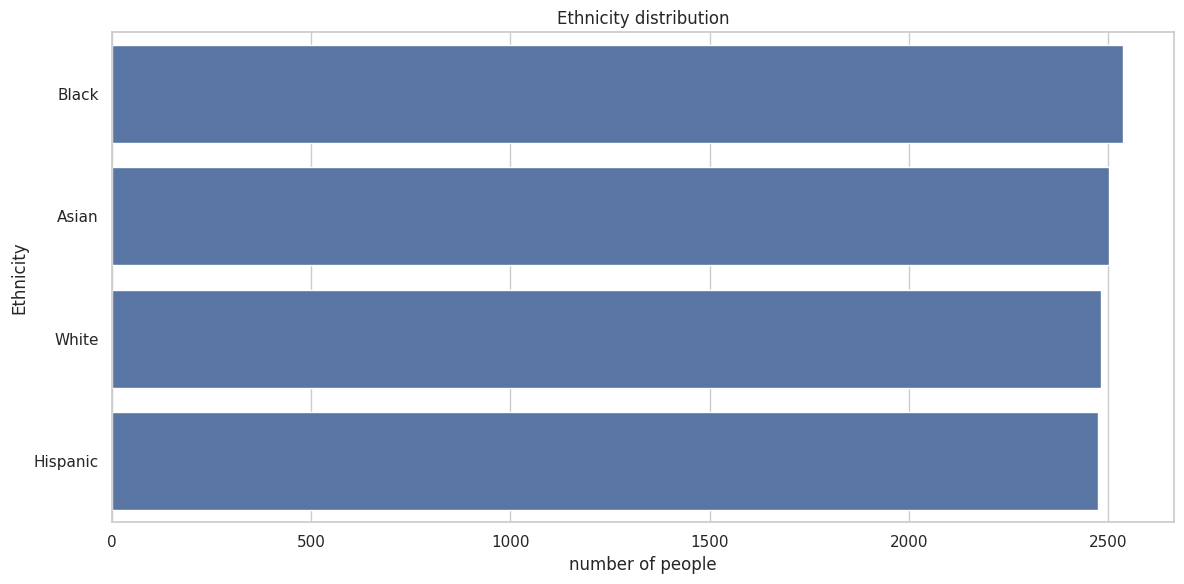

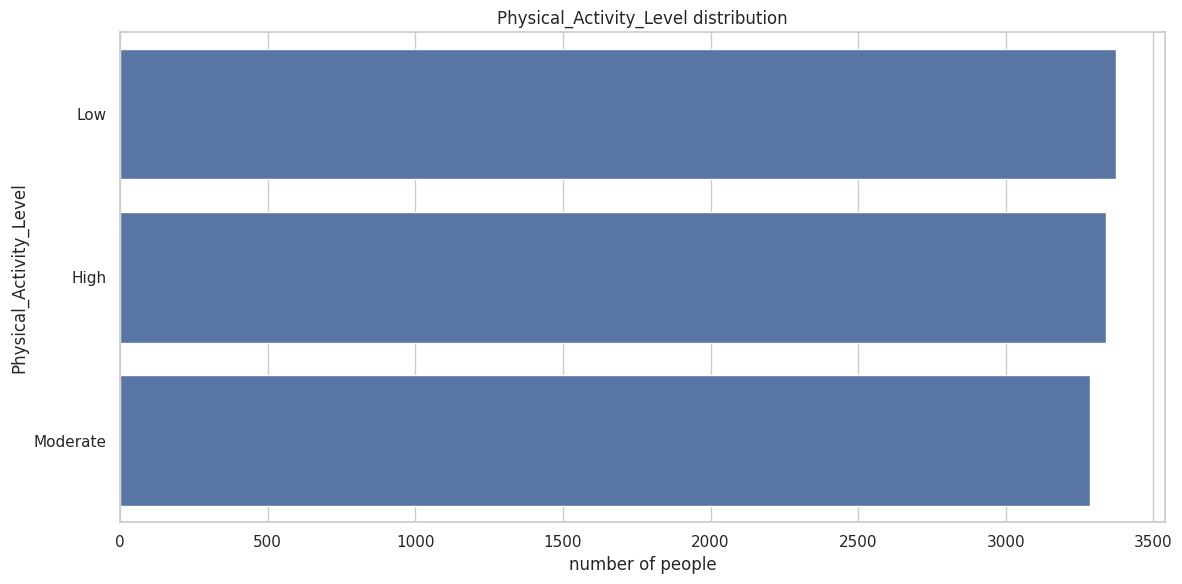

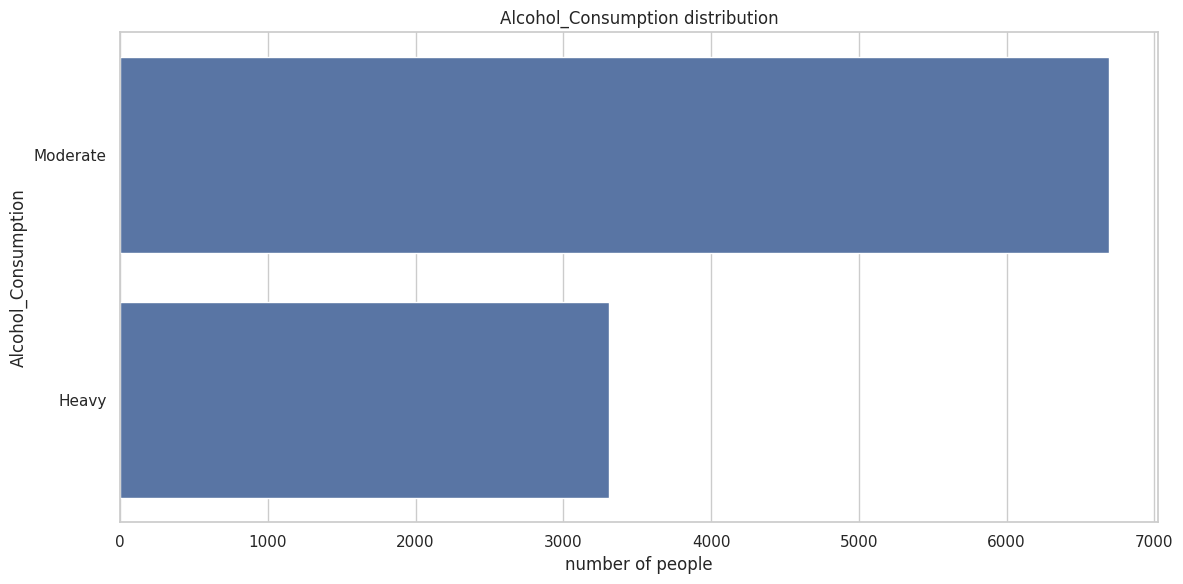

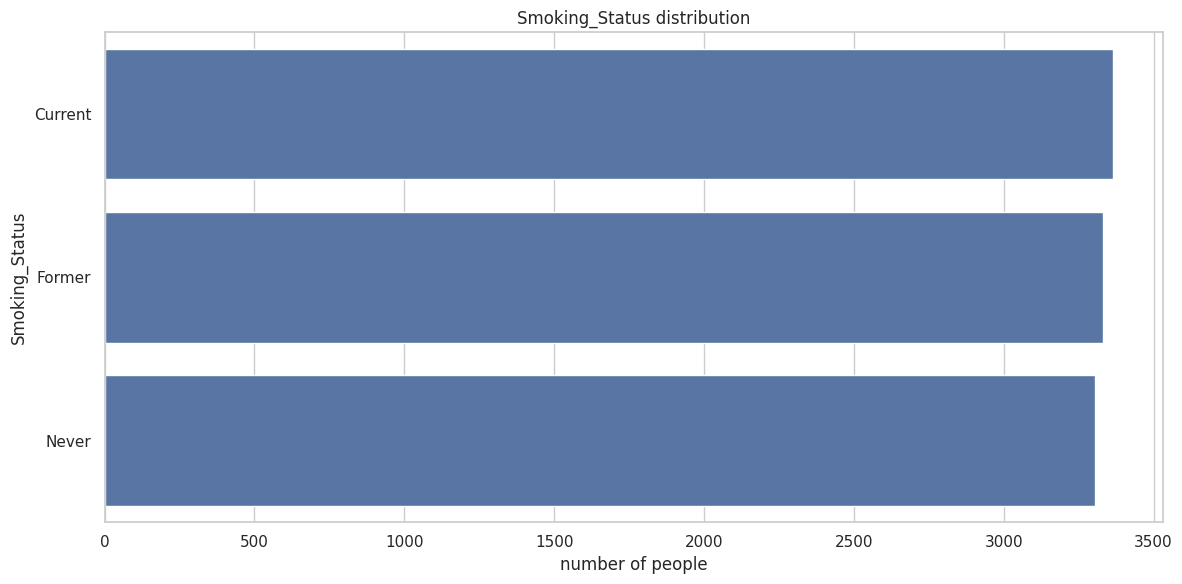

In [44]:
# แสดงการกระจายตัวของตัวแปรเชิงกลุ่ม
categorical_columns = ['Sex', 'Ethnicity', 'Physical_Activity_Level',
                      'Alcohol_Consumption', 'Smoking_Status']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'{column} distribution')
    plt.xlabel('number of people')
    plt.tight_layout()
    plt.show()

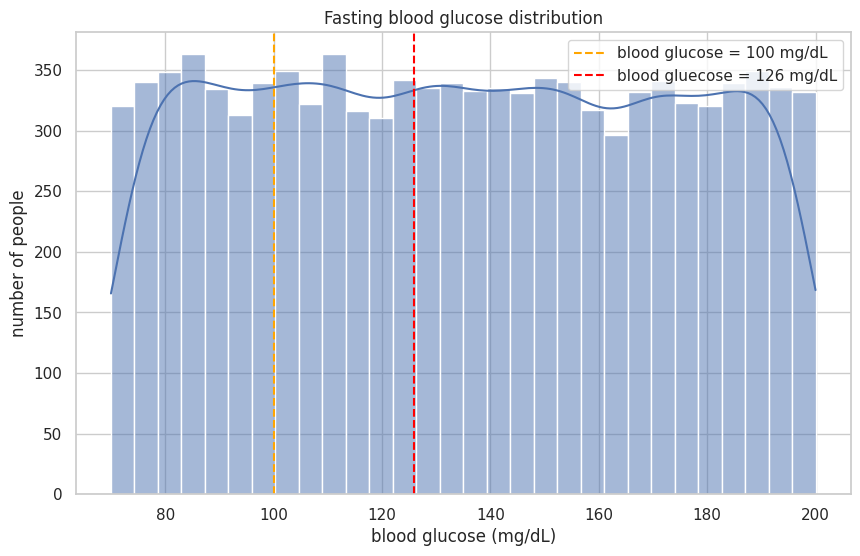

In [46]:
# แสดงการกระจายตัวของระดับน้ำตาลในเลือด
plt.figure(figsize=(10, 6))
sns.histplot(df['Fasting_Blood_Glucose'], bins=30, kde=True)
plt.title('Fasting blood glucose distribution')
plt.xlabel('blood glucose (mg/dL)')
plt.ylabel('number of people')
plt.axvline(x=100, color='orange', linestyle='--', label='blood glucose = 100 mg/dL')
plt.axvline(x=126, color='red', linestyle='--', label='blood gluecose = 126 mg/dL')
plt.legend()
plt.show()

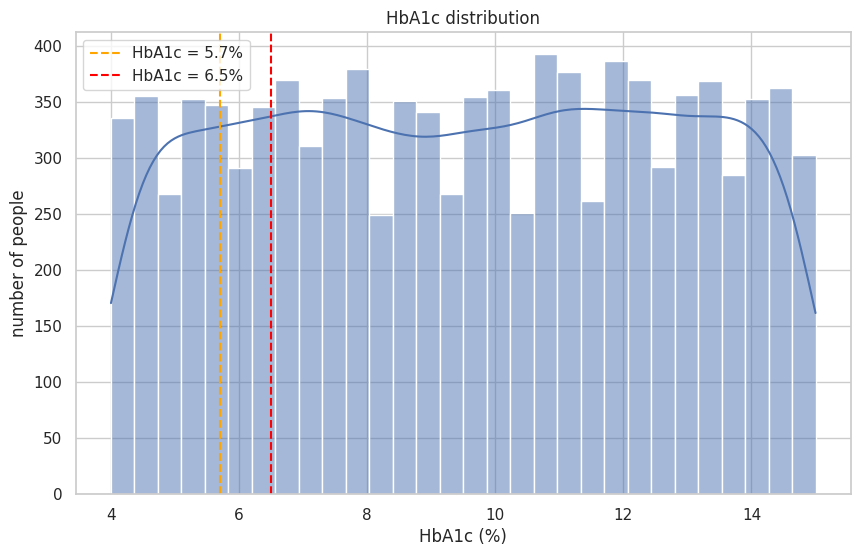

In [47]:
# แสดงการกระจายตัวของ HbA1c
plt.figure(figsize=(10, 6))
sns.histplot(df['HbA1c'], bins=30, kde=True)
plt.title('HbA1c distribution')
plt.xlabel('HbA1c (%)')
plt.ylabel('number of people')
plt.axvline(x=5.7, color='orange', linestyle='--', label='HbA1c = 5.7%')
plt.axvline(x=6.5, color='red', linestyle='--', label='HbA1c = 6.5%')
plt.legend()
plt.show()

In [9]:
# สร้างตัวแปรใหม่สำหรับสถานะเบาหวาน (ถ้ามี HbA1c >= 6.5%)
df['Diabetes_Status'] = (df['HbA1c'] >= 6.5).astype(int)
print(f"จำนวนคนที่มีเบาหวาน (HbA1c >= 6.5%): {df['Diabetes_Status'].sum()}")
print(f"จำนวนคนที่ไม่มีเบาหวาน (HbA1c < 6.5%): {len(df) - df['Diabetes_Status'].sum()}")

จำนวนคนที่มีเบาหวาน (HbA1c >= 6.5%): 7784
จำนวนคนที่ไม่มีเบาหวาน (HbA1c < 6.5%): 2216


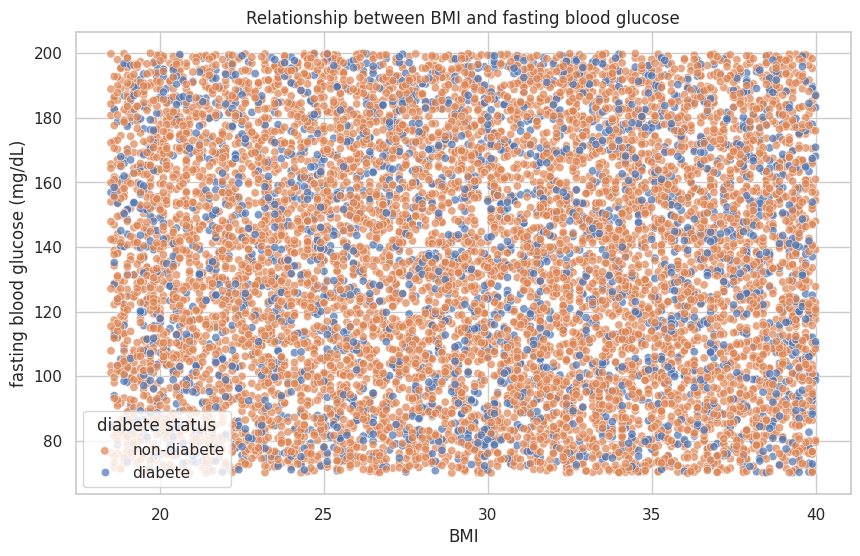

In [48]:
# แสดงความสัมพันธ์ระหว่าง BMI และระดับน้ำตาลในเลือด
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Fasting_Blood_Glucose', hue='Diabetes_Status', data=df, alpha=0.7)
plt.title('Relationship between BMI and fasting blood glucose')
plt.xlabel('BMI')
plt.ylabel('fasting blood glucose (mg/dL)')
plt.legend(title='diabete status', labels=['non-diabete', 'diabete'])
plt.grid(True)
plt.show()

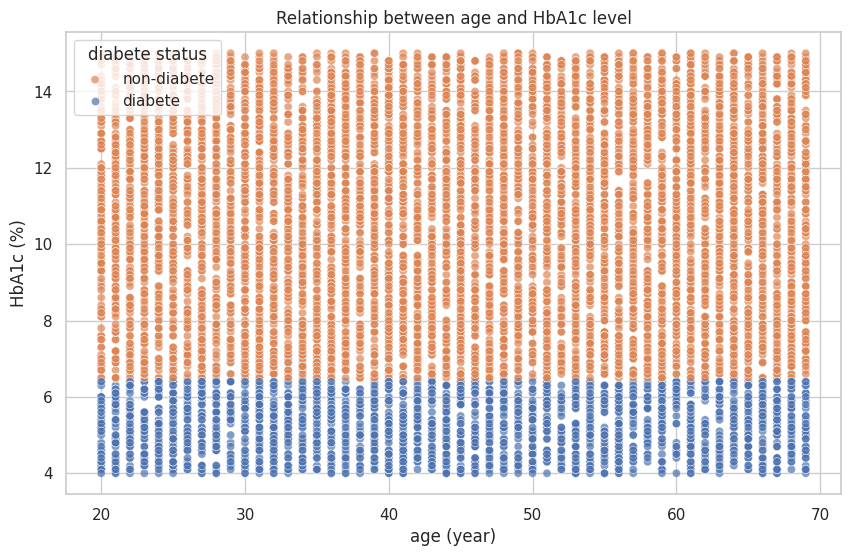

In [51]:
# แสดงความสัมพันธ์ระหว่างอายุและระดับ HbA1c
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='HbA1c', hue='Diabetes_Status', data=df, alpha=0.7)
plt.title('Relationship between age and HbA1c level')
plt.xlabel('age (year)')
plt.ylabel('HbA1c (%)')
plt.legend(title='diabete status', labels=['non-diabete', 'diabete'])
plt.grid(True)
plt.show()

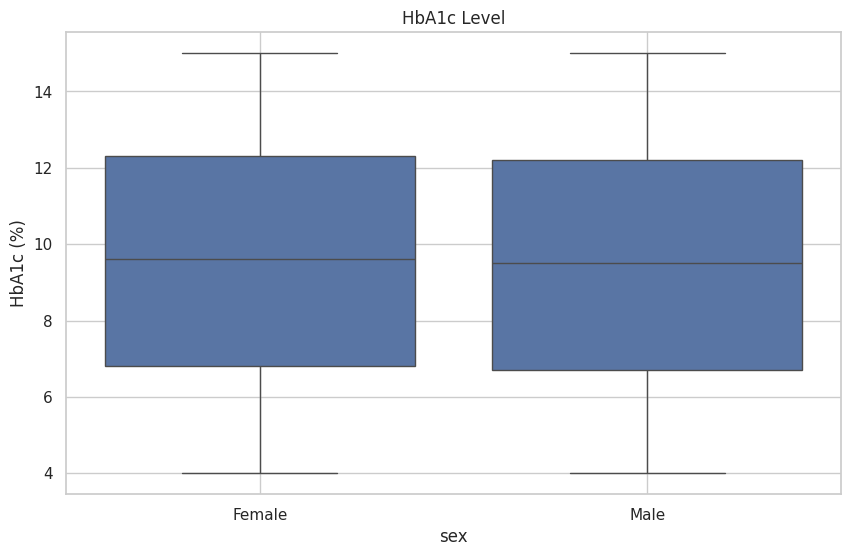

In [52]:
# สร้าง Boxplot เปรียบเทียบระดับ HbA1c ตามเพศ
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='HbA1c', data=df)
plt.title('HbA1c Level')
plt.xlabel('sex')
plt.ylabel('HbA1c (%)')
plt.grid(True)
plt.show()

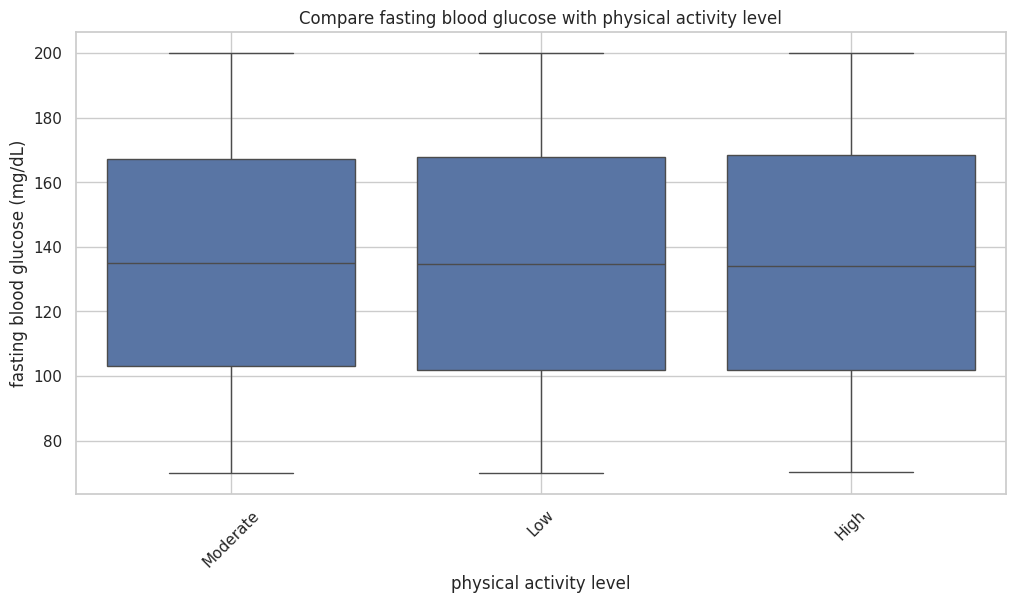

In [53]:
# สร้าง Boxplot เปรียบเทียบระดับน้ำตาลในเลือดตามกลุ่มกิจกรรมทางกาย
plt.figure(figsize=(12, 6))
sns.boxplot(x='Physical_Activity_Level', y='Fasting_Blood_Glucose', data=df)
plt.title('Compare fasting blood glucose with physical activity level')
plt.xlabel('physical activity level')
plt.ylabel('fasting blood glucose (mg/dL)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

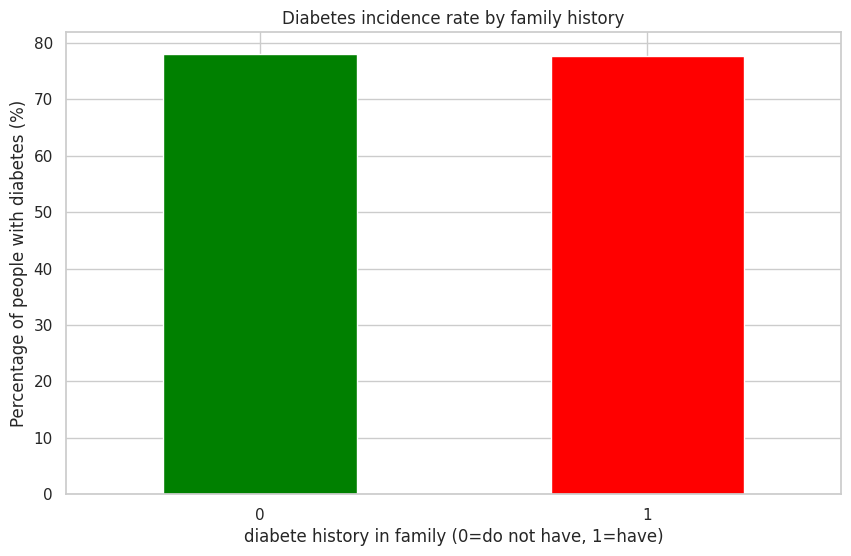

In [56]:
# เปรียบเทียบอัตราการเกิดเบาหวานตามประวัติครอบครัว
plt.figure(figsize=(10, 6))
diabetes_by_family = df.groupby('Family_History_of_Diabetes')['Diabetes_Status'].mean() * 100
diabetes_by_family.plot(kind='bar', color=['green', 'red'])
plt.title('Diabetes incidence rate by family history')
plt.xlabel('diabete history in family (0=do not have, 1=have)')
plt.ylabel('Percentage of people with diabetes (%)')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

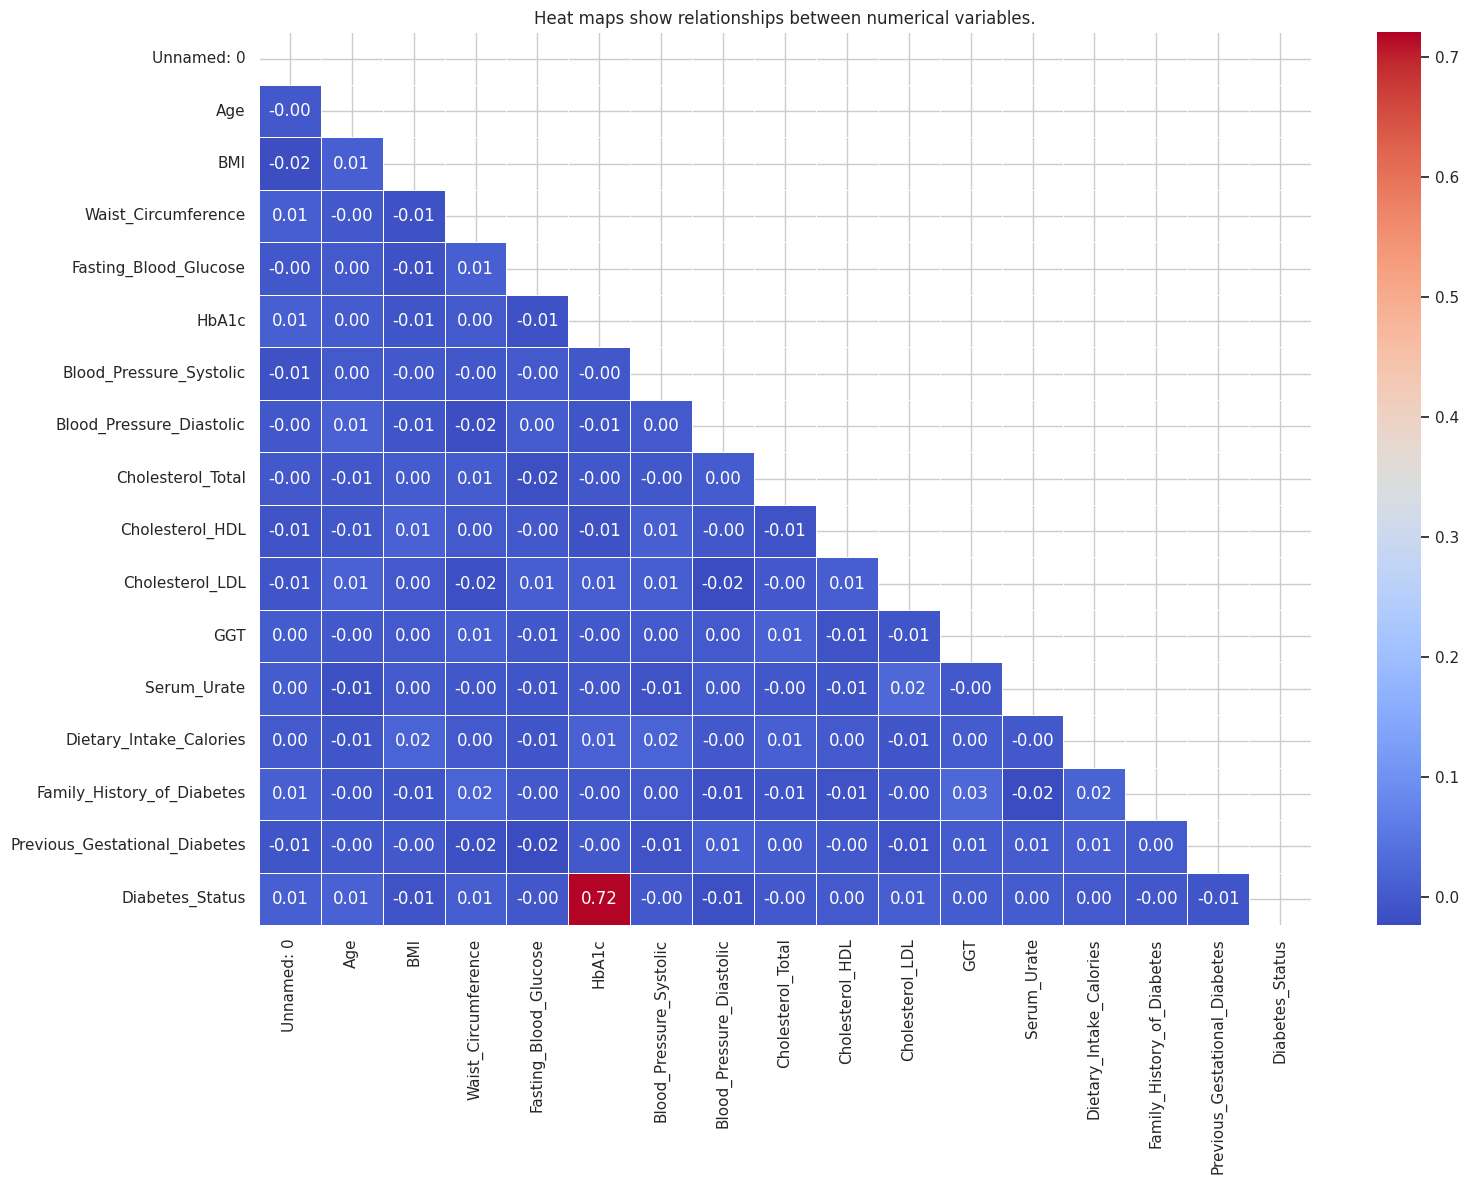

In [57]:
# สร้างแผนที่ความร้อนแสดงความสัมพันธ์ระหว่างตัวแปรเชิงตัวเลข
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(16, 12))
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heat maps show relationships between numerical variables.')
plt.tight_layout()
plt.show()

In [59]:
# สร้างกราฟโต้ตอบแสดงความสัมพันธ์ระหว่าง BMI, อายุ และ HbA1c
fig = px.scatter(df, x='BMI', y='Age', color='HbA1c',
                 size='Waist_Circumference', hover_name=df.index,
                 hover_data=['Sex', 'Fasting_Blood_Glucose', 'Diabetes_Status'],
                 color_continuous_scale='Viridis',
                 title='Relationship between BMI, age and HbA1c')
fig.show()

In [60]:
# สร้างกราฟโต้ตอบแสดงความสัมพันธ์ระหว่างระดับน้ำตาลในเลือดและ BMI ตามเพศ
fig = px.scatter(df, x='Fasting_Blood_Glucose', y='BMI', color='Sex',
                 facet_col='Diabetes_Status', opacity=0.7,
                 title='Relationship between fasting blood glucose and BMI base on sex and diabete status',
                 labels={'Diabetes_Status': 'สถานะเบาหวาน (0=non-diabete, 1=diabete)'})
fig.show()

In [61]:
# สร้างกลุ่มอายุ
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100],
                         labels=['< 30', '30-40', '40-50', '50-60', '> 60'])

# สร้างกราฟแท่งแสดงจำนวนผู้ป่วยเบาหวานตามกลุ่มอายุและเพศ
diabetes_by_age_sex = df.groupby(['Age_Group', 'Sex'])['Diabetes_Status'].mean().reset_index()
fig = px.bar(diabetes_by_age_sex, x='Age_Group', y='Diabetes_Status', color='Sex', barmode='group',
             title='diabete rate base on sex and age',
             labels={'Diabetes_Status': 'diabete rate', 'Age_Group': 'age group'})
fig.update_layout(yaxis_tickformat='.0%')
fig.show()

<ipython-input-61-857cbed42746>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:
# เตรียมข้อมูลสำหรับการสร้างโมเดล
# เลือกเฉพาะคอลัมน์ตัวเลขและแปลงตัวแปรประเภทเป็น one-hot encoding
categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level',
                    'Alcohol_Consumption', 'Smoking_Status']
X_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

numeric_cols = ['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose',
                'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL',
                'Dietary_Intake_Calories', 'Family_History_of_Diabetes']
X_numeric = df[numeric_cols]

# รวมข้อมูลตัวแปรอิสระ
X = pd.concat([X_numeric, X_categorical], axis=1)
y = df['Diabetes_Status']

# ตรวจสอบตัวแปรที่ใช้ในโมเดล
print(f"จำนวนตัวแปรในโมเดล: {X.shape[1]}")
print("ตัวอย่างคอลัมน์ที่ใช้ในโมเดล:")
print(list(X.columns)[:10], "...")  # แสดงเพียง 10 คอลัมน์แรก

จำนวนตัวแปรในโมเดล: 20
ตัวอย่างคอลัมน์ที่ใช้ในโมเดล:
['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'Dietary_Intake_Calories'] ...


In [20]:
# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"ขนาดข้อมูลฝึก: {X_train.shape[0]} แถว")
print(f"ขนาดข้อมูลทดสอบ: {X_test.shape[0]} แถว")

# มาตรฐานข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("ทำการมาตรฐานข้อมูลเรียบร้อยแล้ว")

ขนาดข้อมูลฝึก: 7000 แถว
ขนาดข้อมูลทดสอบ: 3000 แถว
ทำการมาตรฐานข้อมูลเรียบร้อยแล้ว


ฝึกโมเดล Logistic Regression เรียบร้อยแล้ว

ผลการประเมินโมเดล Logistic Regression:
ความแม่นยำ: 0.7760

รายงานการจำแนกประเภท:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       672
           1       0.78      1.00      0.87      2328

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.60      0.78      0.68      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



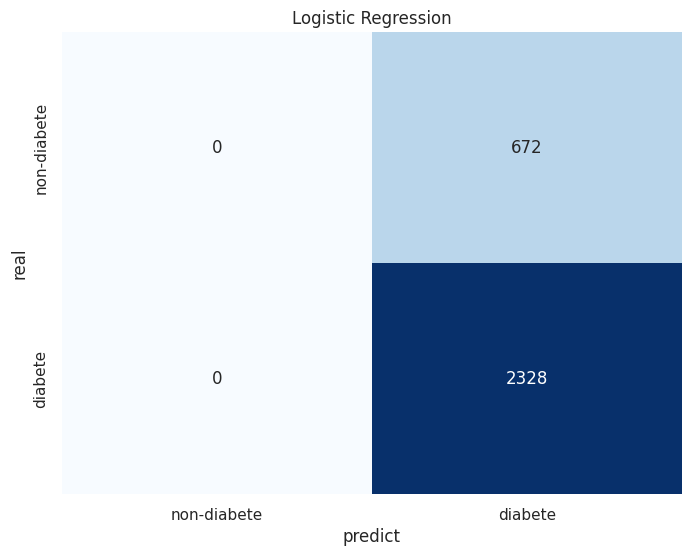

In [62]:
# สร้างและฝึกโมเดล Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)
print("ฝึกโมเดล Logistic Regression เรียบร้อยแล้ว")

# ทำนายด้วยโมเดล Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)

# ประเมินผลโมเดล Logistic Regression
print("\nผลการประเมินโมเดล Logistic Regression:")
print(f"ความแม่นยำ: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nรายงานการจำแนกประเภท:")
print(classification_report(y_test, y_pred_log))

# แสดงเมทริกซ์ความสับสน (Confusion Matrix)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression')
plt.ylabel('real')
plt.xlabel('predict')
plt.xticks([0.5, 1.5], labels=['non-diabete', 'diabete'])
plt.yticks([0.5, 1.5], labels=['non-diabete', 'diabete'])
plt.show()

ฝึกโมเดล Random Forest เรียบร้อยแล้ว

ผลการประเมินโมเดล Random Forest:
ความแม่นยำ: 0.7753

รายงานการจำแนกประเภท:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       672
           1       0.78      1.00      0.87      2328

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.60      0.78      0.68      3000



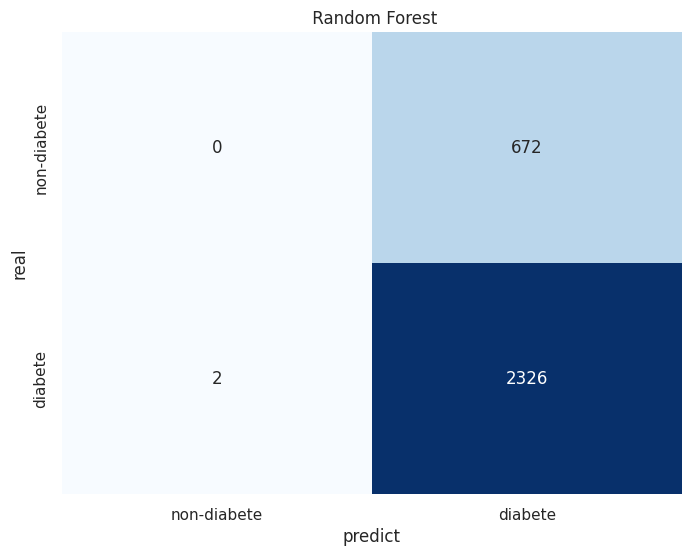

In [63]:
# สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
print("ฝึกโมเดล Random Forest เรียบร้อยแล้ว")

# ทำนายด้วยโมเดล Random Forest
y_pred_rf = rf_model.predict(X_test)

# ประเมินผลโมเดล Random Forest
print("\nผลการประเมินโมเดล Random Forest:")
print(f"ความแม่นยำ: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nรายงานการจำแนกประเภท:")
print(classification_report(y_test, y_pred_rf))

# แสดงเมทริกซ์ความสับสน (Confusion Matrix)
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(' Random Forest')
plt.ylabel('real')
plt.xlabel('predict')
plt.xticks([0.5, 1.5], labels=['non-diabete', 'diabete'])
plt.yticks([0.5, 1.5], labels=['non-diabete', 'diabete'])
plt.show()

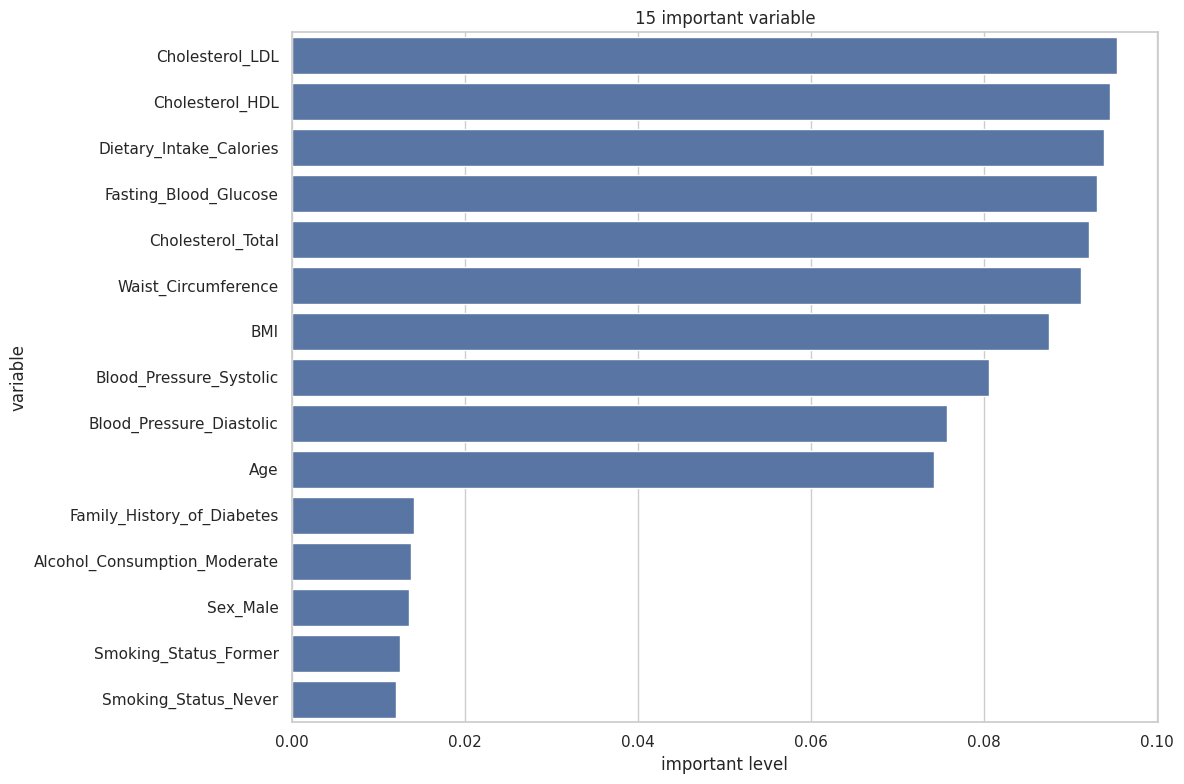

In [64]:
# แสดงความสำคัญของตัวแปรในโมเดล Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('15 important variable')
plt.xlabel('important level')
plt.ylabel('variable')
plt.tight_layout()
plt.show()

In [24]:
# สรุปผลการวิเคราะห์
print("สรุปผลการวิเคราะห์ข้อมูล Diabetes Dataset")
print("-" * 50)

# สรุปข้อมูลทั่วไป
print(f"จำนวนข้อมูลทั้งหมด: {len(df)} คน")
diabetes_count = df['Diabetes_Status'].sum()
print(f"จำนวนผู้ป่วยเบาหวาน (HbA1c >= 6.5%): {diabetes_count} คน ({diabetes_count/len(df)*100:.2f}%)")
print(f"จำนวนผู้ที่ไม่เป็นเบาหวาน: {len(df) - diabetes_count} คน ({(len(df) - diabetes_count)/len(df)*100:.2f}%)")

# ค่าเฉลี่ยของตัวแปรสำคัญตามสถานะเบาหวาน
important_vars = ['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
                 'Blood_Pressure_Systolic', 'Cholesterol_Total']
means_by_diabetes = df.groupby('Diabetes_Status')[important_vars].mean()
print("\nค่าเฉลี่ยของตัวแปรสำคัญตามสถานะเบาหวาน:")
display(means_by_diabetes)

# สรุปปัจจัยเสี่ยงที่สำคัญ
print("\nปัจจัยเสี่ยงที่สำคัญต่อการเกิดเบาหวาน:")
for feature, importance in zip(feature_importance['Feature'].head(5), feature_importance['Importance'].head(5)):
    print(f"- {feature}: {importance:.4f}")

# ประสิทธิภาพของโมเดลทำนาย
print("\nประสิทธิภาพของโมเดลทำนายเบาหวาน:")
print(f"- Logistic Regression: ความแม่นยำ {accuracy_score(y_test, y_pred_log):.4f}")
print(f"- Random Forest: ความแม่นยำ {accuracy_score(y_test, y_pred_rf):.4f}")

# ข้อแนะนำ
print("\nข้อแนะนำจากผลการวิเคราะห์:")
print("1. การคัดกรองเบาหวานควรให้ความสำคัญกับผู้ที่มีระดับน้ำตาลในเลือดสูง ดัชนีมวลกายสูง และมีประวัติเบาหวานในครอบครัว")
print("2. การส่งเสริมกิจกรรมทางกายและการควบคุมน้ำหนักอาจช่วยลดความเสี่ยงต่อการเกิดเบาหวาน")
print("3. ผู้ที่มีระดับ HbA1c อยู่ในช่วง 5.7-6.4% ควรได้รับคำแนะนำในการป้องกันเบาหวาน")
print("4. ควรเพิ่มความตระหนักเกี่ยวกับความเสี่ยงของเบาหวานในกลุ่มผู้สูงอายุและผู้ที่มีค่า BMI สูง")

สรุปผลการวิเคราะห์ข้อมูล Diabetes Dataset
--------------------------------------------------
จำนวนข้อมูลทั้งหมด: 10000 คน
จำนวนผู้ป่วยเบาหวาน (HbA1c >= 6.5%): 7784 คน (77.84%)
จำนวนผู้ที่ไม่เป็นเบาหวาน: 2216 คน (22.16%)

ค่าเฉลี่ยของตัวแปรสำคัญตามสถานะเบาหวาน:


,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Cholesterol_Total
Diabetes_Status,,,,,,,
0,44.312274,29.539892,94.605370,134.998736,5.217825,134.232401,225.328520
1,44.708119,29.383492,94.851644,134.712860,10.728726,134.144142,225.119142



ปัจจัยเสี่ยงที่สำคัญต่อการเกิดเบาหวาน:
- Cholesterol_LDL: 0.0953
- Cholesterol_HDL: 0.0945
- Dietary_Intake_Calories: 0.0939
- Fasting_Blood_Glucose: 0.0931
- Cholesterol_Total: 0.0921

ประสิทธิภาพของโมเดลทำนายเบาหวาน:
- Logistic Regression: ความแม่นยำ 0.7760
- Random Forest: ความแม่นยำ 0.7753

ข้อแนะนำจากผลการวิเคราะห์:
1. การคัดกรองเบาหวานควรให้ความสำคัญกับผู้ที่มีระดับน้ำตาลในเลือดสูง ดัชนีมวลกายสูง และมีประวัติเบาหวานในครอบครัว
2. การส่งเสริมกิจกรรมทางกายและการควบคุมน้ำหนักอาจช่วยลดความเสี่ยงต่อการเกิดเบาหวาน
3. ผู้ที่มีระดับ HbA1c อยู่ในช่วง 5.7-6.4% ควรได้รับคำแนะนำในการป้องกันเบาหวาน
4. ควรเพิ่มความตระหนักเกี่ยวกับความเสี่ยงของเบาหวานในกลุ่มผู้สูงอายุและผู้ที่มีค่า BMI สูง


In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# สร้างแดชบอร์ดสรุปด้วย Plotly
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "bar"}]],
    subplot_titles=("สัดส่วนผู้ป่วยเบาหวาน", "ค่าเฉลี่ย HbA1c ตามกลุ่มอายุ",
                    "ความสัมพันธ์ระหว่าง BMI และระดับน้ำตาลในเลือด", "ปัจจัยสำคัญในการทำนายเบาหวาน")
)

# 1. สัดส่วนผู้ป่วยเบาหวาน (Pie Chart)
fig.add_trace(
    go.Pie(
        labels=["ไม่เป็นเบาหวาน", "เป็นเบาหวาน"],
        values=[(len(df) - diabetes_count), diabetes_count],
        marker=dict(colors=["#2ecc71", "#e74c3c"]),
        textinfo="percent+label"
    ),
    row=1, col=1
)

# 2. ค่าเฉลี่ย HbA1c ตามกลุ่มอายุ (Bar Chart)
hba1c_by_age = df.groupby('Age_Group')['HbA1c'].mean().reset_index()
fig.add_trace(
    go.Bar(
        x=hba1c_by_age['Age_Group'],
        y=hba1c_by_age['HbA1c'],
        marker=dict(color="#3498db"),
        text=hba1c_by_age['HbA1c'].round(2),
        textposition="auto"
    ),
    row=1, col=2
)

# 3. ความสัมพันธ์ระหว่าง BMI และระดับน้ำตาลในเลือด (Scatter Plot)
fig.add_trace(
    go.Scatter(
        x=df['BMI'],
        y=df['Fasting_Blood_Glucose'],
        mode='markers',
        marker=dict(
            size=8,
            color=df['Diabetes_Status'],
            colorscale=[[0, "#2ecc71"], [1, "#e74c3c"]],
            showscale=True,
            colorbar=dict(title="เบาหวาน")
        ),
        opacity=0.7
    ),
    row=2, col=1
)

# 4. ปัจจัยสำคัญในการทำนายเบาหวาน (Bar Chart)
top_features = feature_importance.head(5)
fig.add_trace(
    go.Bar(
        x=top_features['Importance'],
        y=top_features['Feature'],
        marker=dict(color="#9b59b6"),
        orientation='h',
        text=top_features['Importance'].round(3),
        textposition="auto"
    ),
    row=2, col=2
)

# ปรับแต่งแดชบอร์ด
fig.update_layout(
    height=800,
    width=1200,
    title_text="แดชบอร์ดสรุปการวิเคราะห์ข้อมูล Diabetes Dataset",
    showlegend=False
)

# แสดงแดชบอร์ด
fig.show()

<ipython-input-25-c414a38951c3>:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [26]:
import pickle

# บันทึกโมเดล Random Forest
with open('diabetes_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# บันทึก scaler
with open('diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("บันทึกโมเดลและ scaler เรียบร้อยแล้ว")

# ตัวอย่างการโหลดและใช้งานโมเดล
print("\nตัวอย่างการโหลดและใช้งานโมเดล:")
print("```python")
print("import pickle")
print("\n# โหลดโมเดล")
print("with open('diabetes_rf_model.pkl', 'rb') as f:")
print("    loaded_model = pickle.load(f)")
print("\n# โหลด scaler")
print("with open('diabetes_scaler.pkl', 'rb') as f:")
print("    loaded_scaler = pickle.load(f)")
print("\n# ใช้งานโมเดลกับข้อมูลใหม่")
print("new_data = pd.DataFrame({...})  # สร้างข้อมูลใหม่ตามโครงสร้างของ X")
print("new_data_scaled = loaded_scaler.transform(new_data)")
print("predictions = loaded_model.predict(new_data_scaled)")
print("```")

บันทึกโมเดลและ scaler เรียบร้อยแล้ว

ตัวอย่างการโหลดและใช้งานโมเดล:
```python
import pickle

# โหลดโมเดล
with open('diabetes_rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# โหลด scaler
with open('diabetes_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# ใช้งานโมเดลกับข้อมูลใหม่
new_data = pd.DataFrame({...})  # สร้างข้อมูลใหม่ตามโครงสร้างของ X
new_data_scaled = loaded_scaler.transform(new_data)
predictions = loaded_model.predict(new_data_scaled)
```


In [29]:
# บันทึกรายงานสรุปเป็น HTML
from IPython.display import HTML, display

# สร้างรายงานสรุป
report = f"""
<h1>รายงานการวิเคราะห์ข้อมูล Diabetes Dataset</h1>
<hr>
<h2>ข้อมูลทั่วไป</h2>
<p>จำนวนข้อมูลทั้งหมด: {len(df)} คน</p>
<p>จำนวนผู้ป่วยเบาหวาน (HbA1c >= 6.5%): {diabetes_count} คน ({diabetes_count/len(df)*100:.2f}%)</p>
<p>จำนวนผู้ที่ไม่เป็นเบาหวาน: {len(df) - diabetes_count} คน ({(len(df) - diabetes_count)/len(df)*100:.2f}%)</p>

<h2>ปัจจัยเสี่ยงที่สำคัญต่อการเกิดเบาหวาน</h2>
<ul>
"""

# เพิ่มข้อมูลปัจจัยเสี่ยง
for feature, importance in zip(feature_importance['Feature'].head(5), feature_importance['Importance'].head(5)):
    report += f"<li>{feature}: {importance:.4f}</li>"

report += """
</ul>

<h2>ประสิทธิภาพของโมเดลทำนายเบาหวาน</h2>
<ul>
"""

report += f"<li>Logistic Regression: ความแม่นยำ {accuracy_score(y_test, y_pred_log):.4f}</li>"
report += f"<li>Random Forest: ความแม่นยำ {accuracy_score(y_test, y_pred_rf):.4f}</li>"

report += """
</ul>

<h2>ข้อแนะนำจากผลการวิเคราะห์</h2>
<ol>
    <li>การคัดกรองเบาหวานควรให้ความสำคัญกับผู้ที่มีระดับน้ำตาลในเลือดสูง ดัชนีมวลกายสูง และมีประวัติเบาหวานในครอบครัว</li>
    <li>การส่งเสริมกิจกรรมทางกายและการควบคุมน้ำหนักอาจช่วยลดความเสี่ยงต่อการเกิดเบาหวาน</li>
    <li>ผู้ที่มีระดับ HbA1c อยู่ในช่วง 5.7-6.4% ควรได้รับคำแนะนำในการป้องกันเบาหวาน</li>
    <li>ควรเพิ่มความตระหนักเกี่ยวกับความเสี่ยงของเบาหวานในกลุ่มผู้สูงอายุและผู้ที่มีค่า BMI สูง</li>
</ol>
</div>
"""

# แสดงรายงาน
display(HTML(report))

# บันทึกรายงานเป็นไฟล์ HTML
with open('diabetes_analysis_report.html', 'w', encoding='utf-8') as f:
    f.write(report)

print("บันทึกรายงานเป็นไฟล์ HTML เรียบร้อยแล้ว")

บันทึกรายงานเป็นไฟล์ HTML เรียบร้อยแล้ว
